# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository]([http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [88]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import gridspec
import numpy as np


In [89]:
# load the training dataset
data = pd.read_csv('data/real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

In [5]:
# Your code to explore data and train a regression model
data.shape

(414, 7)

## Clean Data
Are ther any missing values?

In [4]:
data.isnull().sum()

transaction_date            0
house_age                   0
transit_distance            0
local_convenience_stores    0
latitude                    0
longitude                   0
price_per_unit              0
dtype: int64

There are no missing values. Let's look at the distribution of features to see if there are outliers. 

In [11]:
def print_stats(var):
   
# the stats
    mean_var = var.mean()
    std_var = var.std()
    min_var = var.min()
    q01_var = var.quantile(0.01)
    q25_var = var.quantile(0.25)
    median_var = var.median()
    q75_var = var.quantile(0.75)
    q99_var = var.quantile(0.99)
    max_var = var.max()
    mode_var = var.mode()[0]
    
    stats = 'Mean          : {:.2f}\nStd.Dev      : {:.2f}\nMode          : {:.2f}\nMinimum    : {:.2f}\n01-quantile: {:.2f}\n25-quantile: {:.2f}\nMedian       : {:.2f}\n75-quantile: {:.2f}\n99-quantile: {:.2f}\nMaximum   : {:.2f}'.format(
                                mean_var
                               ,std_var
                               ,mode_var
                               ,min_var
                               ,q01_var
                               ,q25_var
                               ,median_var
                               ,q75_var
                               ,q99_var 
                               ,max_var)
   
    # set up figure
    fig, ax = plt.subplots(2, 1
                    ,figsize = (15, 5)
                    ,sharex = True
                    ,gridspec_kw = {'hspace': 0
                                   ,'height_ratios': [5, 1]})
   

 
    fig.suptitle('Distribution ' + var.name)
    
    # histogram
    ax[0].hist(var,  bins = np.arange(min_var, max_var, (q99_var - q01_var)/15))
    ax[0].set_ylabel('Frequency')
    # stat-lines
    ax[0].axvline(x = q01_var, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x = q99_var, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x = mean_var, color = 'black', linestyle ='solid', linewidth = 2)
    ax[0].axvline(x = median_var, color = 'black', linestyle='dashed', linewidth = 2)

    ax[0].annotate(stats, xy = (.85, .5), xycoords='axes fraction')
    
    # boxplot
    ax[1].boxplot(var, vert = False)
    ax[1].set_xlabel('Value')

    ax[0].label_outer()
    fig.show()

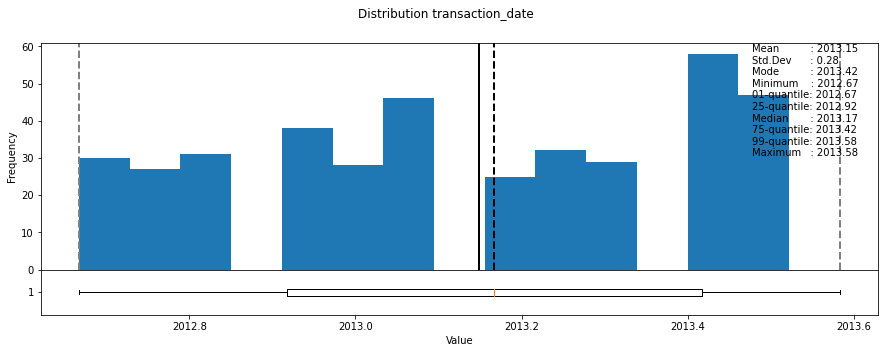

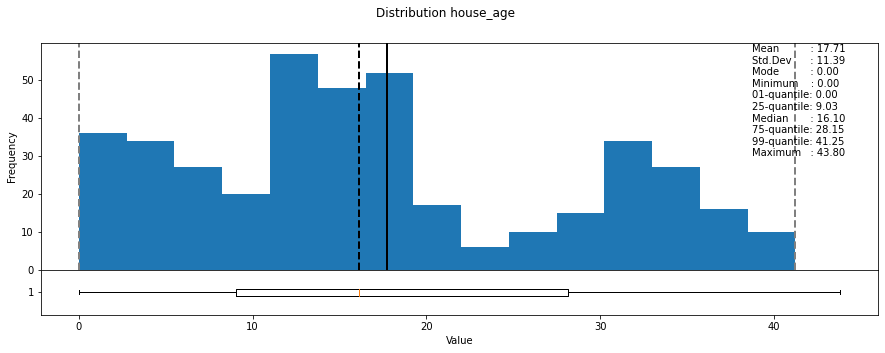

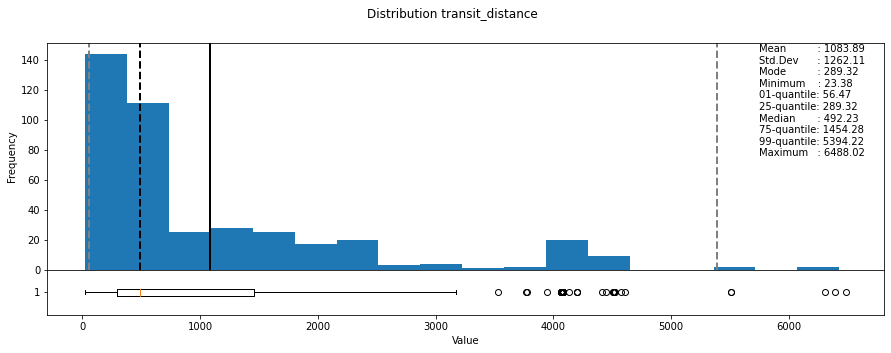

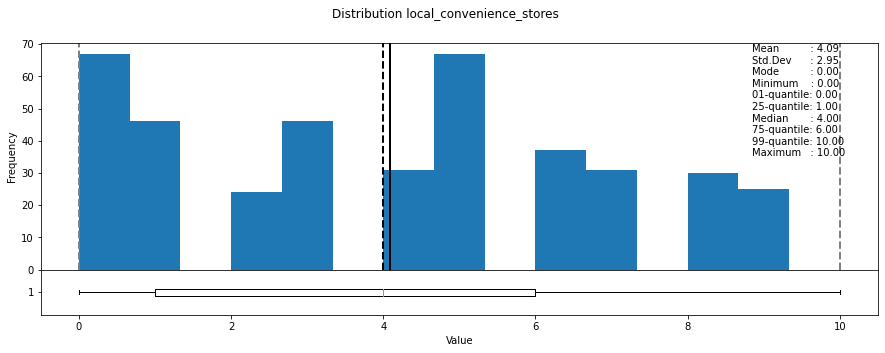

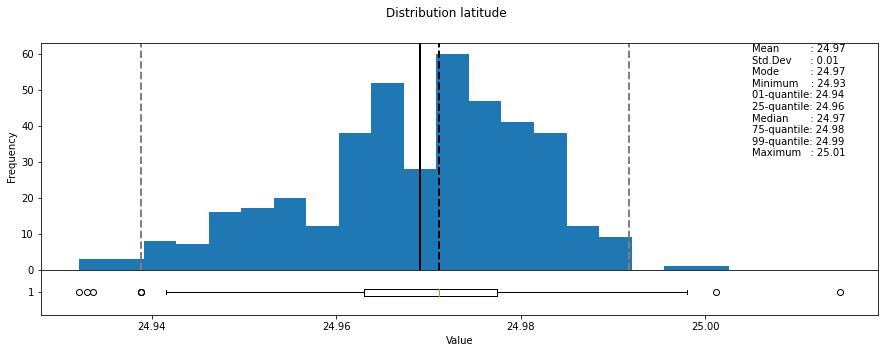

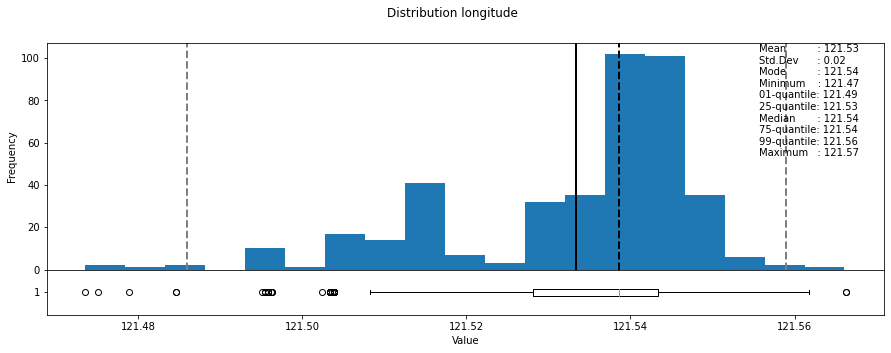

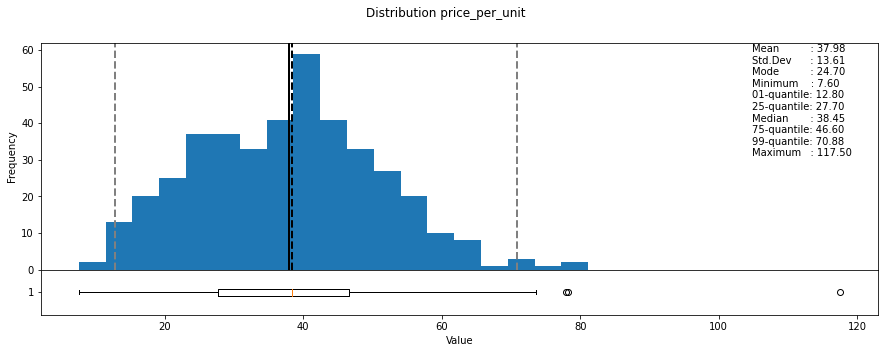

In [15]:
for ft in data.columns:
    print_stats(data[ft])

There are outliers for **transit_distance**,  **latitude** and **longitude** and **price_per_unit**.
I'll will delete the houses with:
* ~~**transit_distance** greater than the 99-quantile~~
* ~~**latitude** greater than the 99-quantile~~
* **price_per_unit** greater than 100

A price that far off will have great impact on a lineair model.

In [128]:
 data['price_per_unit'].quantile(0.99)

63.3

In [91]:
data = data[data['transit_distance'] <= data['transit_distance'].quantile(0.99)]
#data = data[data['latitude'] <= q99_latitude]
data = data[data['price_per_unit'] <= data['price_per_unit'].quantile(0.99)]

## Feature Engineering

Lets make a scatterplot of latitude and longitude to see where the houses are situated.

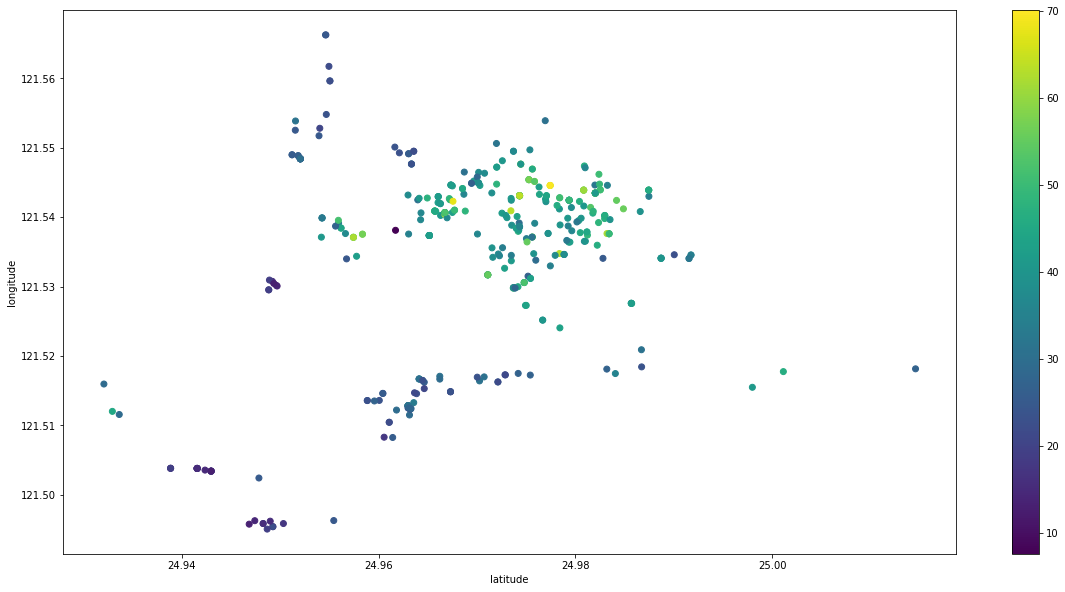

In [92]:
# quantiles
qlat_01 = data['latitude'].quantile(0.01)
qlat_99 = data['latitude'].quantile(0.99)
qlon_01 = data['longitude'].quantile(0.01)
qlon_99 = data['longitude'].quantile(0.99)

# the plot
plt.figure(figsize=(20,10))
plt.scatter(x =  data['latitude'], y =  data['longitude'], c  = data['price_per_unit'])
plt.xlabel("latitude")
plt.ylabel("longitude")
plt.colorbar()

# quantile lines
#plt.axvline(x = qlat_01, color = 'gray', linestyle = 'dashed', linewidth = 2)
#plt.axvline(x = qlat_99, color = 'gray', linestyle = 'dashed', linewidth = 2)
#plt.axhline(y = qlon_01, color = 'gray', linestyle = 'dashed', linewidth = 2)
#plt.axhline(y = qlon_99, color = 'gray', linestyle = 'dashed', linewidth = 2)
plt.show()

I will cluster **latitude** and **longitude** into 6 clusters using `kmean custering` and use this cluster as a feauture instead of latitude and longitude.

In [93]:
# https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
from sklearn.cluster import KMeans
X = data[['latitude','longitude']]
kmeans = KMeans(n_clusters = 5) 
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Let's see the clusters

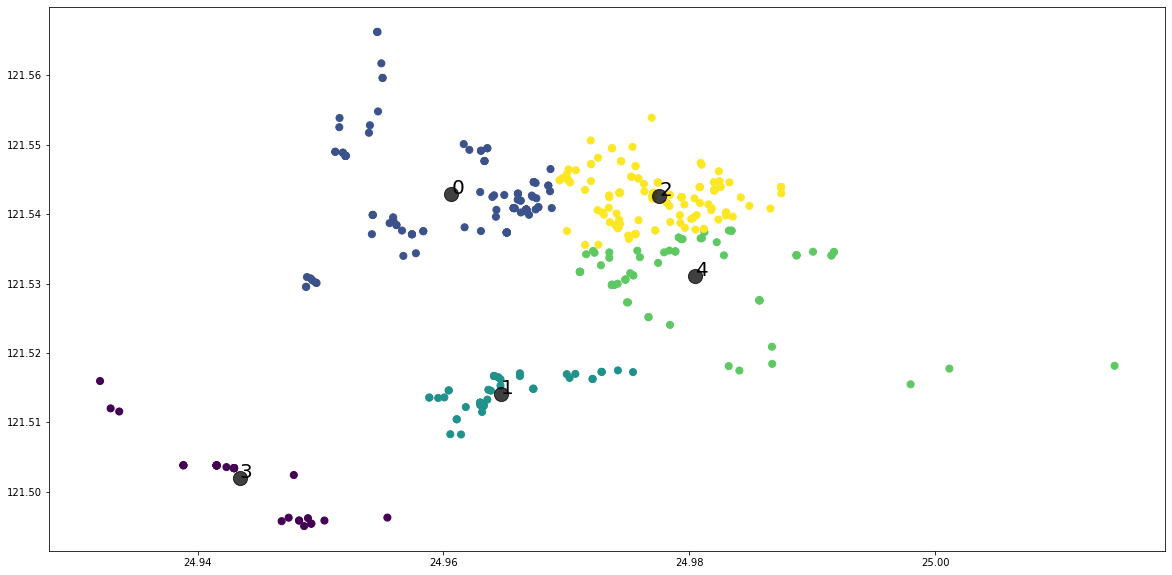

In [94]:
plt.figure(figsize=(20, 10))
plt.scatter(data['latitude'], data['longitude'], c = y_kmeans, s = 50, cmap = 'viridis')

centers = kmeans.cluster_centers_ # coordinats of center
#labels = kmeans.labels_
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200, alpha= 0.75)
for i, label in enumerate(kmeans.fit_predict(centers)):
    #plt.annotate(label, (centers[i, 0], centers[i, 1]),textcoords = 'offset points')
    plt.annotate(label, xy =(centers[i, 0], centers[i, 1]), size = 20 )
plt.show()

In [95]:
# kmeans.predict([[24.98298, 121.54024]])
# add cluster to data
data['area_cluster'] =  kmeans.predict(data[['latitude','longitude']])

In [96]:
data.groupby('area_cluster')['price_per_unit'].describe()

,count,mean,std,min,25%,50%,75%,max
area_cluster,,,,,,,,
0,110.0,36.583636,12.366769,7.6,25.750,37.30,45.325,67.7
1,52.0,26.357692,3.888764,17.7,23.075,26.45,29.425,33.4
2,142.0,45.746479,8.878276,26.5,39.625,44.60,52.100,70.1
3,31.0,19.032258,6.664602,11.6,15.050,18.20,20.600,45.1
4,69.0,39.855072,8.389762,22.8,34.600,39.00,43.900,62.9


In [ ]:
Now, extract the year and month from **transaction_date**.

In [97]:
data['transaction_year'] = np.trunc(data.transaction_date).astype(int)	
data['transaction_month'] = np.round((data.transaction_date - data['transaction_year'])*12 ,0).astype(int) + 1


In [98]:
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit,area_cluster,transaction_year,transaction_month
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2,2012,12
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2,2012,12
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2,2013,8
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2,2013,7
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2,2012,11


In [99]:
numeric_features = ['house_age', 'transit_distance', 'local_convenience_stores','transaction_date']
categorical_features = ['area_cluster', 'transaction_year', 'transaction_month','transaction_date']

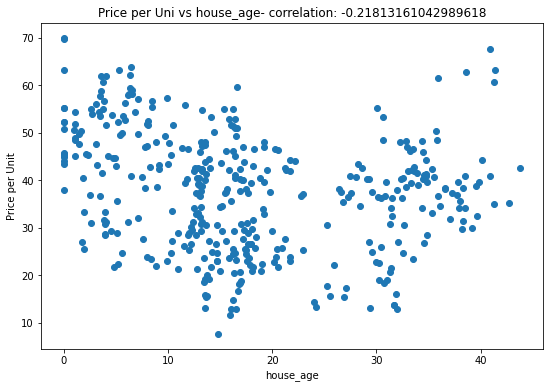

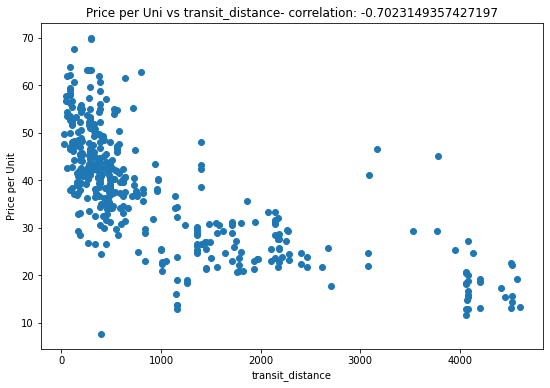

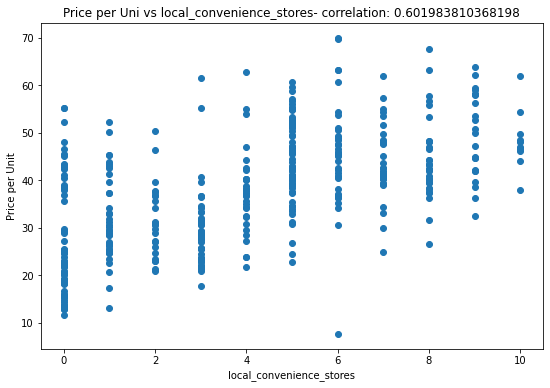

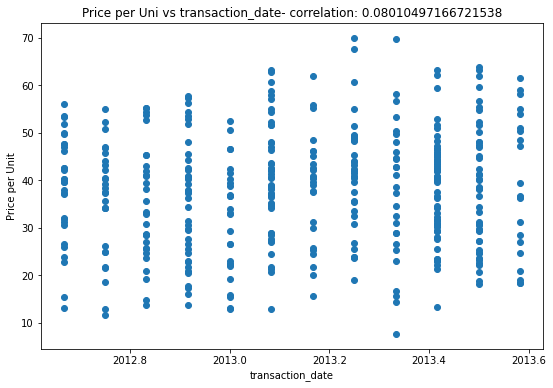

In [100]:

for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    label = data['price_per_unit']
    correlation = feature.corr(label)
    plt.scatter(x = feature, y = label)
    plt.xlabel(col)
    plt.ylabel('Price per Unit')
    ax.set_title('Price per Uni vs ' + col + '- correlation: ' + str(correlation))
plt.show()


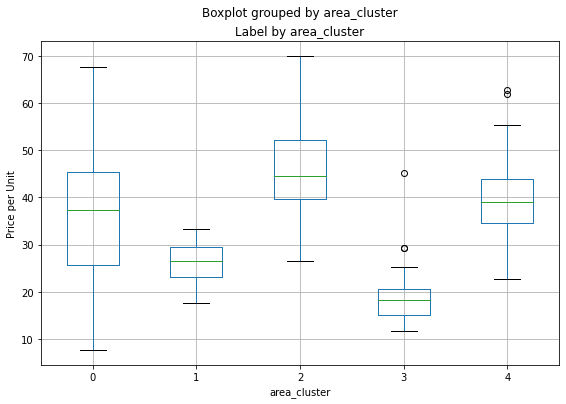

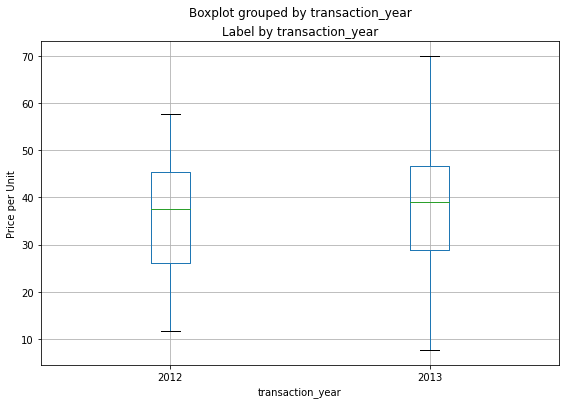

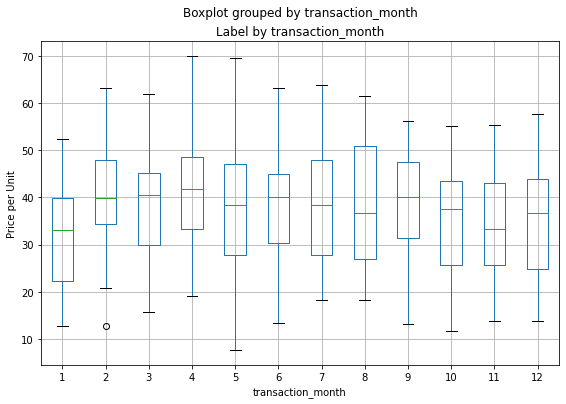

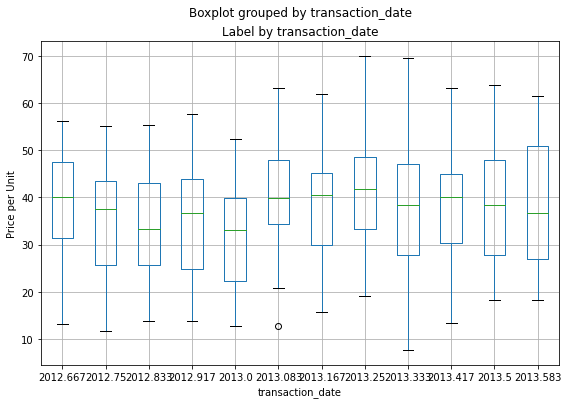

In [101]:
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    data.boxplot(column = 'price_per_unit', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Price per Unit")
plt.show()

In [120]:
# Your code to use the trained model
features = ['house_age', 'transit_distance', 'local_convenience_stores', 'area_cluster', 'transaction_year', 'transaction_month']


In [121]:
data[features].head()

,house_age,transit_distance,local_convenience_stores,area_cluster,transaction_year,transaction_month
0,32.0,84.87882,10,2,2012,12
1,19.5,306.59470,9,2,2012,12
2,13.3,561.98450,5,2,2013,8
3,13.3,561.98450,5,2,2013,7
4,5.0,390.56840,5,2,2012,11


In [122]:
# Separate features and labels
X, y = data[features].values, data['price_per_unit'].values

In [123]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 282 rows
Test Set: 122 rows


In [124]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)


In [125]:
 model.coef_

array([-0.26184639, -0.00623962,  1.17508019,  2.13437424,  3.3305256 ,
        0.21518105])

In [126]:
predictions = model.predict(X_test)

Text(0, 0.5, 'error')

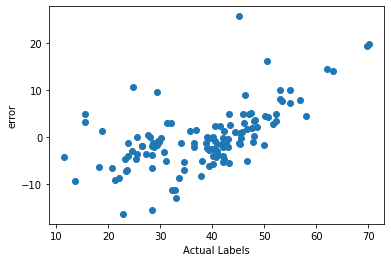

In [118]:
plt.scatter(y_test, y_test - predictions)
plt.xlabel('Actual Labels')
plt.ylabel('error')

In [127]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 42.82094661322093
RMSE: 6.543771589322241
R2: 0.6754857851501403


## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [ ]:
X_new = np.array([[16.2,289.3248,5,24.98203,121.54348],
                  [13.6,4082.015,0,24.94155,121.5038]])

print('Predictions:')
for prediction in results:
    print(round(prediction,2))